In [1]:
import wrangle as w 
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import prepare as p
from datetime import timedelta, datetime

%matplotlib inline


Exercise
Do your work for this exercise in a notebook named explore. Use the techniques in the lesson to explore the store item demand dataset and the opsd dataset.

For the store item demand data, you will need to choose a method of aggregating such that each observation is a unique date. For both datasets you should choose a method of splitting your data and only explore the training split.

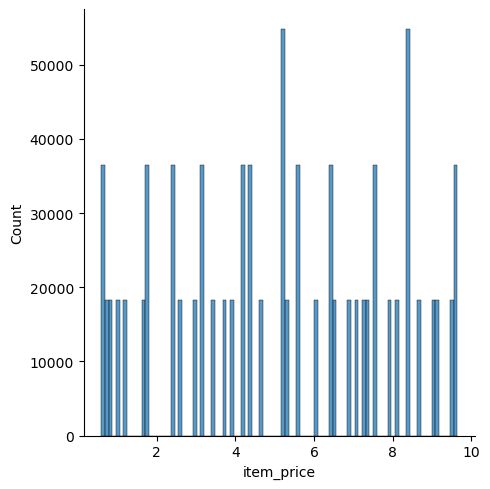

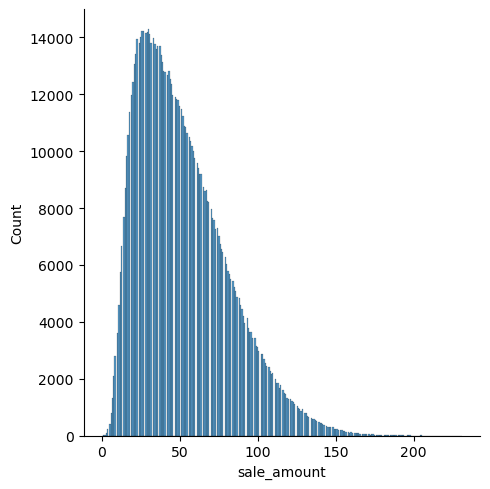

In [2]:
df = p.get_prep_store()

In [3]:
#Human Based Split
train = df[:'2016']
test = df['2017']

/var/folders/4f/nyhvlyfd511911zdvn0fq0_00000gn/T/ipykernel_39030/1085955783.py:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  test = df['2017']


In [4]:
#choose target variable
y = train.sales_total

One of the first things we could do is to ignore the time series component of our data, and use all the other visualzation techniques we know to our data.

<AxesSubplot:ylabel='Frequency'>

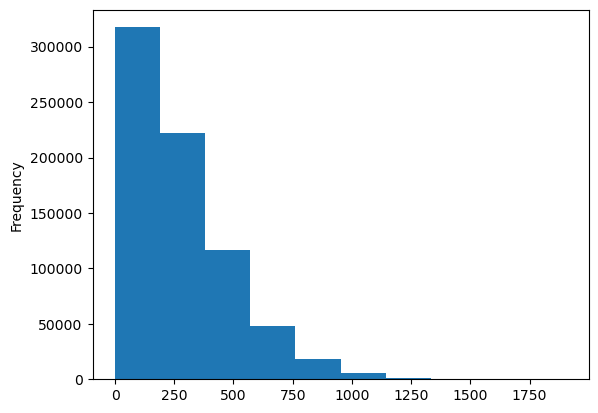

In [5]:
y.plot.hist()

[Text(0.5, 1.0, 'Total Sales by Month'),
 Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'Total Sales')]

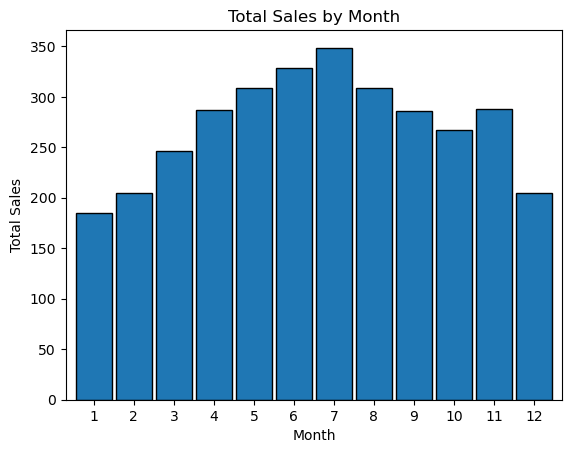

In [6]:
ax = y.groupby(y.index.month).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Total Sales by Month', xlabel='Month', ylabel='Total Sales')

[Text(0.5, 1.0, 'AVG Total Sales by Day'),
 Text(0.5, 24.0, 'Weekday'),
 Text(24.000000000000007, 0.5, 'AVG Sales')]

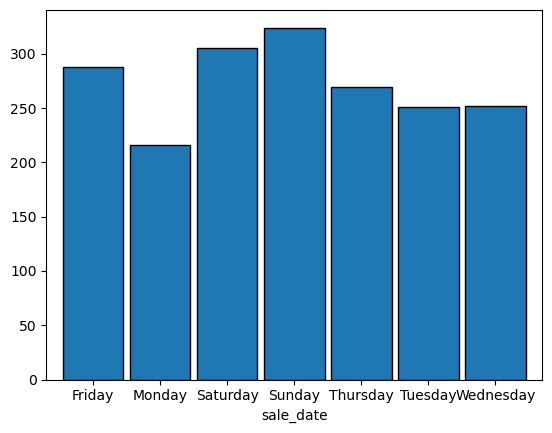

In [7]:
y.groupby(y.index.day_name()).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='AVG Total Sales by Day', xlabel='Weekday', ylabel='AVG Sales')


<AxesSubplot:xlabel='sale_date'>

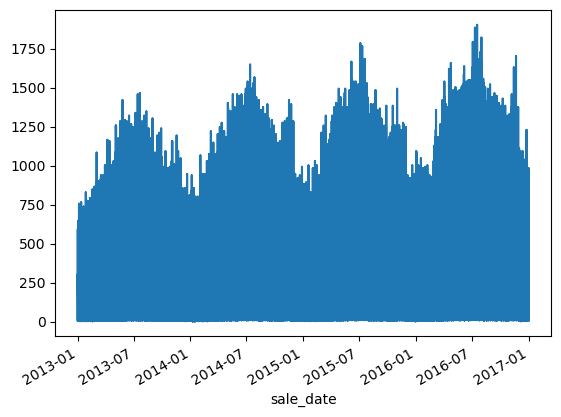

In [8]:
y.plot()

<AxesSubplot:title={'center':'Sales per Week'}, xlabel='sale_date'>

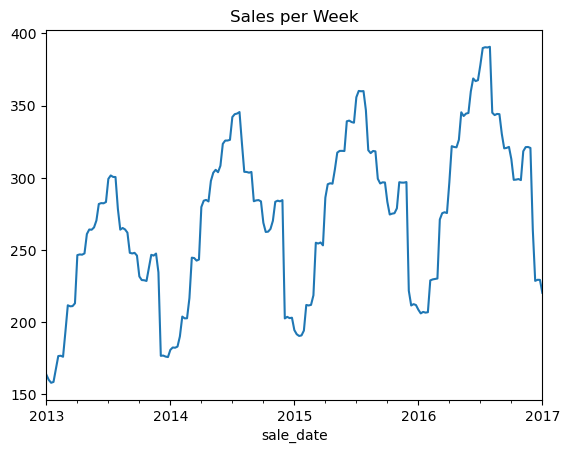

In [9]:
y.resample('W').mean().plot(title= 'Sales per Week')

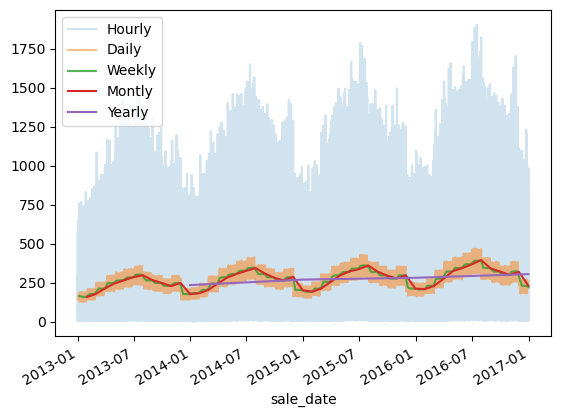

In [10]:
y.plot(alpha=.2, label='Hourly')
y.resample('D').mean().plot(alpha=.5, label='Daily')
y.resample('W').mean().plot(alpha=.8, label='Weekly')
y.resample('M').mean().plot(label='Montly')
y.resample('Y').mean().plot(label='Yearly')
plt.legend()

#this is just to show how the viz is smoothed out with different ways of resampling

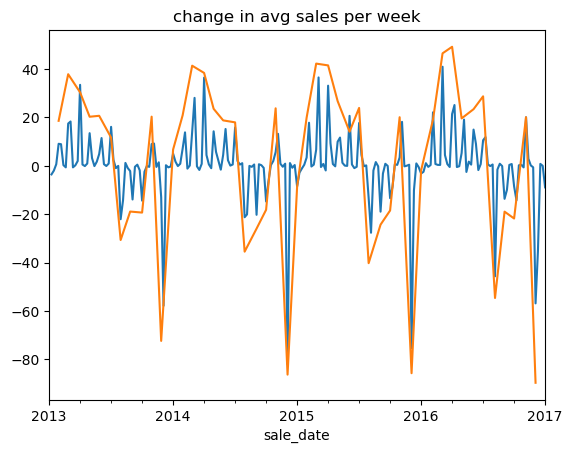

In [11]:
week = y.resample('W').mean().diff().plot(title= 'change in avg sales per week') #Orange line
month = y.resample('M').mean().diff().plot() #Blue line

#shows change in sales by week

<AxesSubplot:title={'center':'Seasonal Plot'}, xlabel='Month', ylabel='Total Sales'>

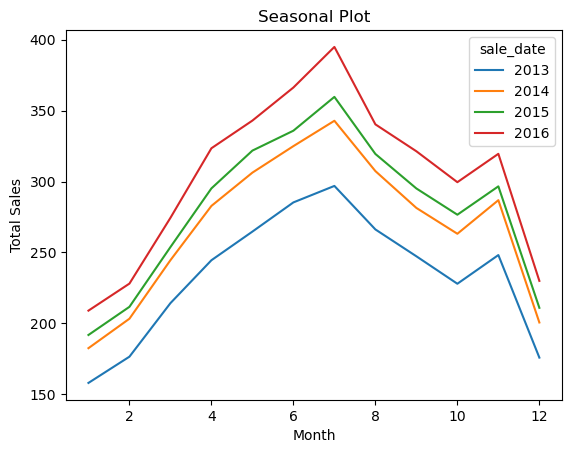

In [12]:
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot(title= 'Seasonal Plot', xlabel= 'Month', ylabel= 'Total Sales')

# first arg in groupby is the line plotted, second arg is the x axis.  y is our target variable 'Total Sales'

Made graphs from above into functions in .py.  Test them below

In [13]:
import time_series_functions as t

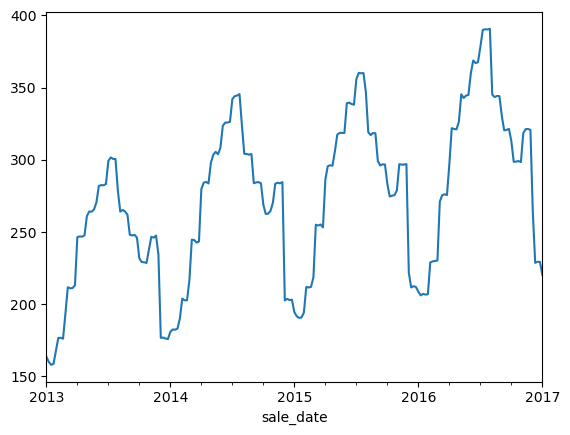

In [ ]:
t.line_avg_week(y)

In [ ]:
t.bar_day(y)

TypeError: Locale must be None, a string, or an iterable of two strings -- language code, encoding.